In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Celerates School/10. Time Series Forecasting/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.date = pd.to_datetime(df.date)
df = df.rename(columns = {'date':'ds', 'meantemp':'y'})

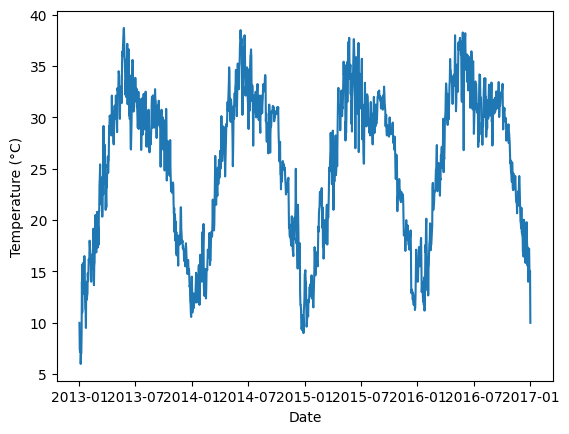

In [ ]:
# Visualize the data
plt.plot(df['ds'], df['y'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [ ]:
# Create a Prophet object and fit it to the data
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp934ezfl3/y3gp_f1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp934ezfl3/7j1sopom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12438', 'data', 'file=/tmp/tmp934ezfl3/y3gp_f1f.json', 'init=/tmp/tmp934ezfl3/7j1sopom.json', 'output', 'file=/tmp/tmp934ezfl3/prophet_modelynzsby0y/prophet_model-20240116020651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31
1826,2018-01-01


In [ ]:
# Make predictions for the future dates
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1822,2017-12-28,15.763790,13.247909,18.360069
1823,2017-12-29,15.666960,13.281779,18.278171
1824,2017-12-30,15.534900,12.907382,18.138563
1825,2017-12-31,15.394173,12.874140,17.933195
1826,2018-01-01,15.582847,12.879852,18.473155


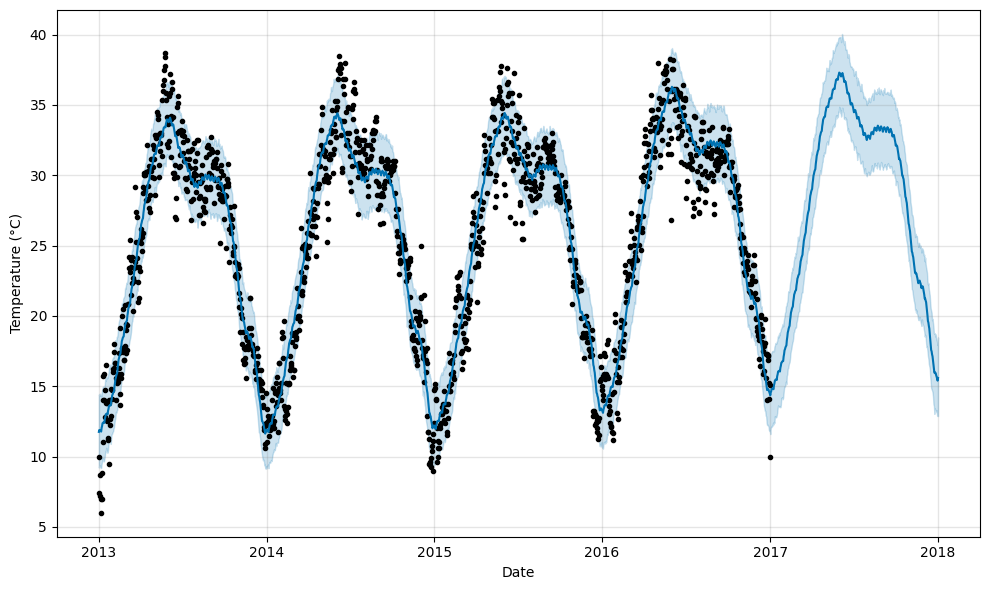

In [ ]:
# Visualize the predictions
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Prophet with Additional Regressors

In [ ]:
future = df[df.ds > '2016-09-01']
train = df[df.ds <= '2016-09-01']

In [ ]:
model = Prophet()
model.add_regressor('humidity')
model.add_regressor('wind_speed')
model.add_regressor('meanpressure')
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp934ezfl3/nsyghvil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp934ezfl3/2wxtdh1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35583', 'data', 'file=/tmp/tmp934ezfl3/nsyghvil.json', 'init=/tmp/tmp934ezfl3/2wxtdh1j.json', 'output', 'file=/tmp/tmp934ezfl3/prophet_modelu8kbh7cs/prophet_model-20240116020923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:09:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future.drop(columns = 'y', inplace= True)

<ipython-input-12-d7a4ce43f1c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future.drop(columns = 'y', inplace= True)


In [ ]:
future.tail()

,ds,humidity,wind_speed,meanpressure
1457,2016-12-28,68.043478,3.547826,1015.565217
1458,2016-12-29,87.857143,6.000000,1016.904762
1459,2016-12-30,89.666667,6.266667,1017.904762
1460,2016-12-31,87.000000,7.325000,1016.100000
1461,2017-01-01,100.000000,0.000000,1016.000000


In [ ]:
# Make predictions for the future dates
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
117,2016-12-28,15.872015,13.779732,18.028523
118,2016-12-29,13.066467,10.955293,15.024572
119,2016-12-30,12.945745,10.734793,15.081654
120,2016-12-31,13.346829,11.259343,15.467605
121,2017-01-01,11.936722,9.819342,13.927234


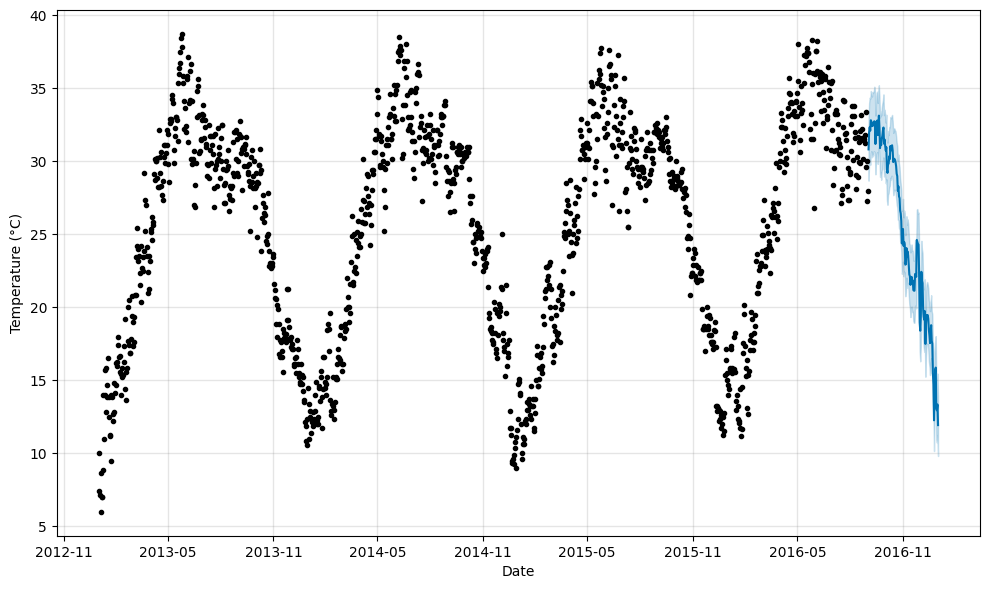

In [ ]:
# Visualize the predictions
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()